In [1]:
import pandas as pd
data = pd.read_csv('Wholesale customers data.csv')
data.shape

(440, 8)

In [2]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [3]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
data.ftypes

Channel             int64:dense
Region              int64:dense
Fresh               int64:dense
Milk                int64:dense
Grocery             int64:dense
Frozen              int64:dense
Detergents_Paper    int64:dense
Delicassen          int64:dense
dtype: object

In [5]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [6]:
data['Region'].unique()

array([3, 1, 2])

In [7]:
data['Channel'].unique()

array([2, 1])

In [8]:
data.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [9]:
mean=data.mean()

In [10]:
type(mean)

pandas.core.series.Series

In [11]:
mean

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [12]:
mean.shape

(8,)

In [13]:
mean.index

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

mean.iloc['Milk']

In [14]:
mean.loc['Milk']

5796.265909090909

In [15]:
devstandard=data.std()

In [16]:
devstandard

Channel                 0.468052
Region                  0.774272
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicassen           2820.105937
dtype: float64

In [17]:
maxval=mean+(3*devstandard)

In [18]:
maxval

Channel                 2.726882
Region                  4.865999
Fresh               49942.284323
Milk                27937.397433
Grocery             36460.765760
Frozen              17635.951816
Detergents_Paper    17185.056526
Delicassen           9985.188267
dtype: float64

In [19]:
minval=mean-(3*devstandard)

In [20]:
minval

Channel                -0.081427
Region                  0.220364
Fresh              -25941.688868
Milk               -16344.865615
Grocery            -20558.211214
Frozen             -11492.088180
Detergents_Paper   -11422.070162
Delicassen          -6935.447358
dtype: float64

Removing outliers

In [21]:
dataNoutliers = data[(data<maxval) & (data>minval)]

In [22]:
dataNoutliers.isnull().sum()

Channel              0
Region               0
Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64

In [23]:
import matplotlib.pyplot as plt
plt.hist(dataNoutliers['Detergents_Paper'].dropna())
plt.plot()

[]

[]

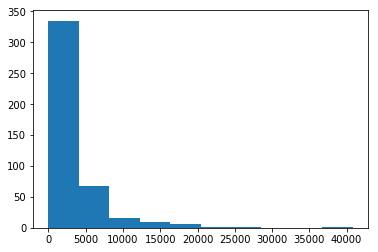

In [24]:
plt.hist(data['Detergents_Paper'])
plt.plot()

[]

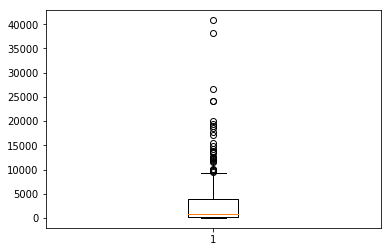

In [26]:
plt.boxplot(data['Detergents_Paper'])
plt.plot()

[]

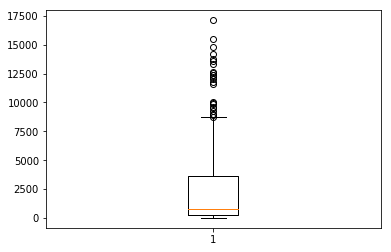

In [27]:
plt.boxplot(dataNoutliers['Detergents_Paper'].dropna())
plt.plot()

[]

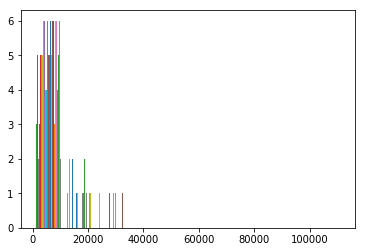

In [35]:
plt.hist(data[['Fresh','Detergents_Paper','Milk','Frozen','Grocery','Delicassen']])
plt.plot()

[]

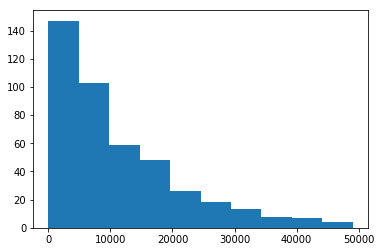

In [65]:
plt.hist(dataNoutliers['Fresh'].dropna())
plt.plot()

[]

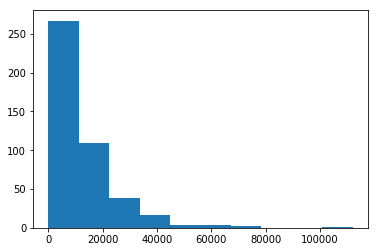

In [66]:
plt.hist(data['Fresh'].dropna())
plt.plot()

(array([182., 107.,  63.,  33.,  21.,   8.,   6.,   5.,   3.,   3.]),
 array([   55. ,  2796.7,  5538.4,  8280.1, 11021.8, 13763.5, 16505.2,
        19246.9, 21988.6, 24730.3, 27472. ]),
 <a list of 10 Patch objects>)

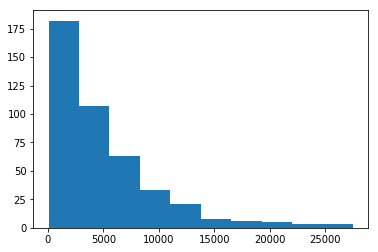

In [29]:
plt.hist(MilkFixed)

(array([185.,  85.,  56.,  45.,  19.,  16.,  12.,   7.,   4.,   4.]),
 array([3.00000e+00, 3.48190e+03, 6.96080e+03, 1.04397e+04, 1.39186e+04,
        1.73975e+04, 2.08764e+04, 2.43553e+04, 2.78342e+04, 3.13131e+04,
        3.47920e+04]),
 <a list of 10 Patch objects>)

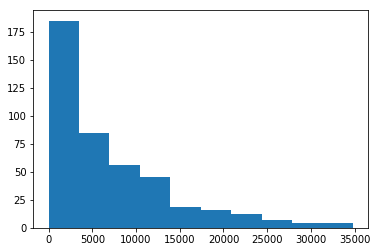

In [30]:
Grocery = data['Grocery']
GroceryFixed =  Grocery[data['Grocery'] < maxval.loc['Grocery']]
plt.hist(GroceryFixed)

(array([232.,  93.,  39.,  25.,  18.,  13.,   4.,   4.,   1.,   5.]),
 array([   25. ,  1714.4,  3403.8,  5093.2,  6782.6,  8472. , 10161.4,
        11850.8, 13540.2, 15229.6, 16919. ]),
 <a list of 10 Patch objects>)

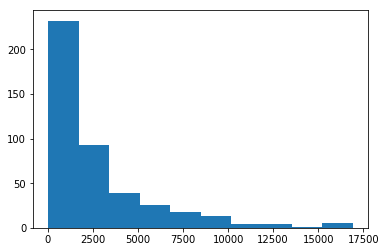

In [31]:
Frozen = data['Frozen']
FrozenFixed =  Frozen[data['Frozen'] < maxval.loc['Frozen']]
plt.hist(FrozenFixed)

(array([275.,  39.,  48.,  26.,  15.,  12.,   2.,   8.,   3.,   2.]),
 array([3.00000e+00, 1.71470e+03, 3.42640e+03, 5.13810e+03, 6.84980e+03,
        8.56150e+03, 1.02732e+04, 1.19849e+04, 1.36966e+04, 1.54083e+04,
        1.71200e+04]),
 <a list of 10 Patch objects>)

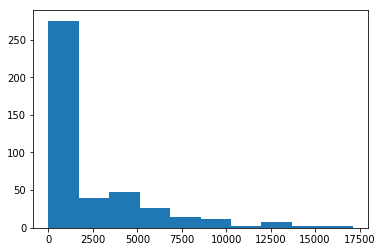

In [32]:
Detergents_Paper = data['Detergents_Paper']
Detergents_PaperFixed =  Detergents_Paper[data['Detergents_Paper'] < maxval.loc['Detergents_Paper']]
plt.hist(Detergents_PaperFixed)

(array([207., 113.,  61.,  27.,   6.,  10.,   6.,   3.,   1.,   2.]),
 array([3.0000e+00, 8.5770e+02, 1.7124e+03, 2.5671e+03, 3.4218e+03,
        4.2765e+03, 5.1312e+03, 5.9859e+03, 6.8406e+03, 7.6953e+03,
        8.5500e+03]),
 <a list of 10 Patch objects>)

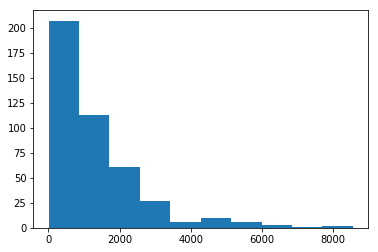

In [33]:
Delicassen = data['Delicassen']
DelicassenFixed =  Delicassen[data['Delicassen'] < maxval.loc['Delicassen']]
plt.hist(DelicassenFixed)



In [34]:
data.shape

(440, 8)

In [35]:
yuca = data.mask(data > maxval,mean, axis=1)

In [36]:
yuca.shape

(440, 8)

In [37]:
yuca.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [38]:
yuca.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0
6,2,3,12126.0,3199.0,6975.0,480.0,3140.0,545.0
7,2,3,7579.0,4956.0,9426.0,1669.0,3321.0,2566.0
8,1,3,5963.0,3648.0,6192.0,425.0,1716.0,750.0
9,2,3,6006.0,11093.0,18881.0,1159.0,7425.0,2098.0
